In [33]:
import numpy as np
import matplotlib.pyplot as plt

import PIL
import PIL.Image as Image
import tensorflow as tf
#import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)

seed = 123
tf.keras.utils.set_random_seed(
    seed
)

TensorFlow version: 2.10.0


In [14]:
import pathlib
archive = 'C:\\Users\\boakl\\Dropbox\\SynchronizeWork\\Datasets\\plants'
data_dir = pathlib.Path(archive).with_suffix('')

In [15]:
archive

'C:\\Users\\boakl\\Dropbox\\SynchronizeWork\\Datasets\\plants'

In [16]:
data_dir

WindowsPath('C:/Users/boakl/Dropbox/SynchronizeWork/Datasets/plants')

In [18]:
image1 = Image.open(str(healthy[0]))
print(image1.format)
print(image1.size)
print(image1.mode)

JPEG
(225, 225)
RGB


In [57]:
# Data cleaning and aquiring data
# Use batch image downloader Fatkun. First use the search "house plant" to populate the healthy category.
# As a first pass at cleaning the data set, we require the image to: 
# show a full, clear view of the plant
# no more than two plants in the image
# mostly matured plants (no seedlings)
# images of real plants (no drawings)
# variety of house plants (including succulents and ivies)
# allowing distractions (humans, potted plants, other decorations)
# As a second pass at cleaning the data, we remove links that are broken

#Then do "wilted house plant"

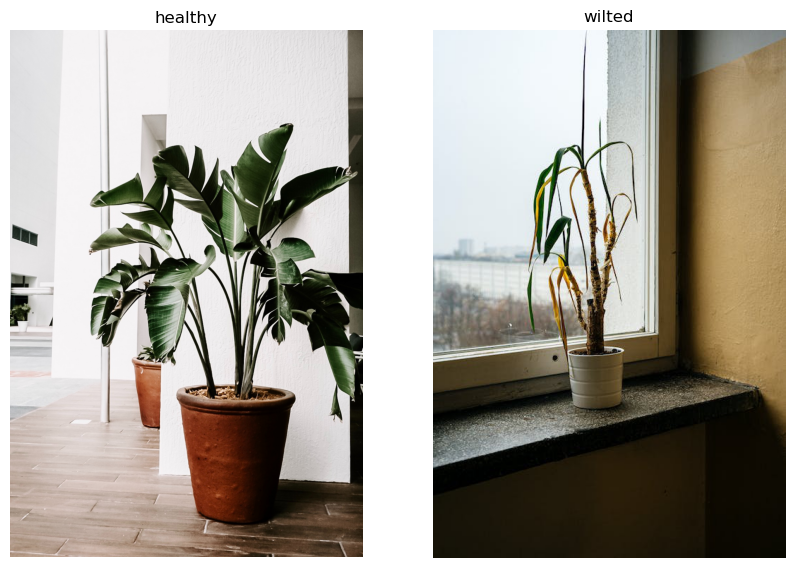

In [56]:
# Example "healthy" due to Julia Kuzenkov 
# (creative commons license) Green Indoor Plants
# https://www.pexels.com/photo/green-indoor-plants-1974508/

# Example "wilted" due to Syn Gor
# (creative commons license) A Wilting Plant on the Windowsill
# https://www.pexels.com/photo/a-wilting-plant-on-the-windowsill-10651660/

plt.figure(figsize=(10, 10))

file = 'C:\\Users\\boakl\\Dropbox\\SynchronizeWork\\Datasets\\plants\\healthy\\pexels-julia-kuzenkov-1974508.jpg'

with PIL.Image.open(file) as im:
    ax = plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.title('healthy')
    plt.axis("off")
    
file2 = 'C:\\Users\\boakl\\Dropbox\\SynchronizeWork\\Datasets\\plants\\wilted\\pexels-photo-10651660.jpeg'

with PIL.Image.open(file2) as im2:
    ax = plt.subplot(1, 2, 2)
    plt.imshow(im2)
    plt.title('wilted')
    plt.axis("off")
